# Wordcloud Demo

## Intended to scrape through a number of news RSS Feeds and generate wordclouds from the results

In [2]:
# Install all requirements for this repo prior to using.
!pip install -r requirements.txt

In [3]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
from newspaper import Article
import nltk
import pandas as pd
from PIL import Image
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /home/mathew/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

### Setup your RSS Feeds

In [4]:
feeds = ['https://globalnews.ca/feed/',
        'https://news.un.org/feed/subscribe/en/news/all/rss.xml',
        'https://www.globalissues.org/news/feed',
        'https://feeds.a.dj.com/rss/RSSWorldNews.xml',
        'https://www.worldpress.org/feeds/topstories.xml',
        'http://feeds.bbci.co.uk/news/world/rss.xml',
        'https://www.nytimes.com/svc/collections/v1/publish/https://www.nytimes.com/section/world/rss.xml',
        'https://www.buzzfeed.com/world.xml',
        'https://www.aljazeera.com/xml/rss/all.xml',
        'https://defence-blog.com/feed/',
        'https://www.rt.com/rss/news/',
        'http://rss.cnn.com/rss/edition_world.rss']

### Pull URLs in from your RSS Feeds

In [5]:
articles = []

for feed in feeds:
    response = requests.get(feed)
    webpage = response.content
    soup = BeautifulSoup(webpage, features='xml')
    
    items = soup.find_all('item')
    
    for item in items:
        link = item.find('link').text
        articles.append(link)

In [6]:
print("Artcles pulled down are: "+str(np.shape(articles))) #Look at list shape

Artcles pulled down are: (326,)


### Download and Parse through your URLs

In [7]:
data = []

for url in articles:
    info = Article(url)
    try:
        info.download()
        info.parse()
        info.nlp()
        keywords = info.keywords
        texts = info.text
        saved = [url, keywords, texts]
        data.append(saved)
    except:
        ## Packing this all in to a try statement to handle bad urls that are sometimes included 
        continue

In [8]:
data[:1] # Look at output example

[['https://globalnews.ca/news/11598524/barrett-ingram-help-raptors-surge-past-hawks/',
  ['ingram',
   'minutes',
   'help',
   '12',
   'rebounds',
   'raptors',
   'points',
   'right',
   'barrett',
   'toronto',
   'surge',
   'hawks',
   'breaking',
   'scoring',
   'play',
   'sign',
   'past'],
  "Send this page to someone via email\n\nTORONTO – Brandon Ingram led the way with 29 points as the Toronto Raptors surged past the Atlanta Hawks 134-117 on Saturday.\n\nRJ Barrett of Mississauga, Ont., who is still on a minutes restriction after spraining his right knee, had a season-high 27 points and four rebounds in 30 minutes of play for Toronto (21-15). Scottie Barnes had 20 points and Ingram added nine rebounds.\n\nSandro Mamukelashvili had a double-double off the bench with 13 points, 12 rebounds and a career-high eight assists.\n\nStory continues below advertisement\n\nDyson Daniels had a double-double with 20 points and 12 assists\n\nGet breaking National news For news impactin

### Put your list of lists into a dataframe

In [9]:
label = ['URL', 'Keywords','Text']
df = pd.DataFrame(data)
df.columns = label

In [10]:
df.shape # If there is a difference some articles were blank or couldn't be read

(269, 3)

### Stop words

In [11]:
## Though there is a set of default stop words (stuff to not be included), sometimes you want to add
stopwords = set(STOPWORDS)
stopwords.update(['globalnews','guardian','abc','nbc','cbs','nytimes','globalnews','state'])
print(stopwords)

{'them', "hadn't", "we've", 'since', 'could', 'same', 'www', 'has', 'my', 'com', 'their', "mustn't", 'else', 'am', 'at', 'however', 'after', 'doing', 'hers', 'had', 'that', "we're", "can't", "couldn't", 'further', "they've", 'having', 'because', 'been', 'were', 'so', "don't", "doesn't", 'if', 'therefore', 'ever', 'through', 'when', 'being', 'down', 'herself', "what's", 'state', 'above', 'globalnews', 'whom', 'into', 'any', "she's", 'which', 'about', 'over', 'i', 'only', 'can', "he's", 'get', 'theirs', "didn't", 'against', 'while', 'why', 'than', 'your', 'itself', "they'll", "won't", "i'd", 'http', "i'm", 'themselves', 'until', 'where', 'nbc', "he'll", 'such', "how's", 'own', "weren't", "here's", 'nytimes', 'have', 'yours', 'what', 'how', 'under', 'for', 'guardian', 'below', 'from', 'myself', 'would', 'off', 'those', 'we', 'do', 'out', 'these', 'more', 'other', 'her', 'cbs', "wasn't", 'his', "he'd", "they're", 'by', 'nor', "shouldn't", 'he', 'there', 'shall', "where's", 'to', 'few', 'be

#### Single Article Example

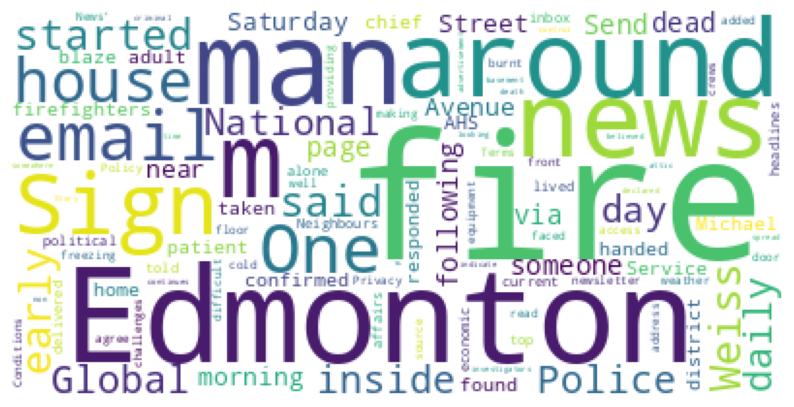

In [12]:
text = df.Text[1]

wordcloud = WordCloud(stopwords=stopwords,max_words=200,background_color='white').generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show;

#### All Keywords from all articles

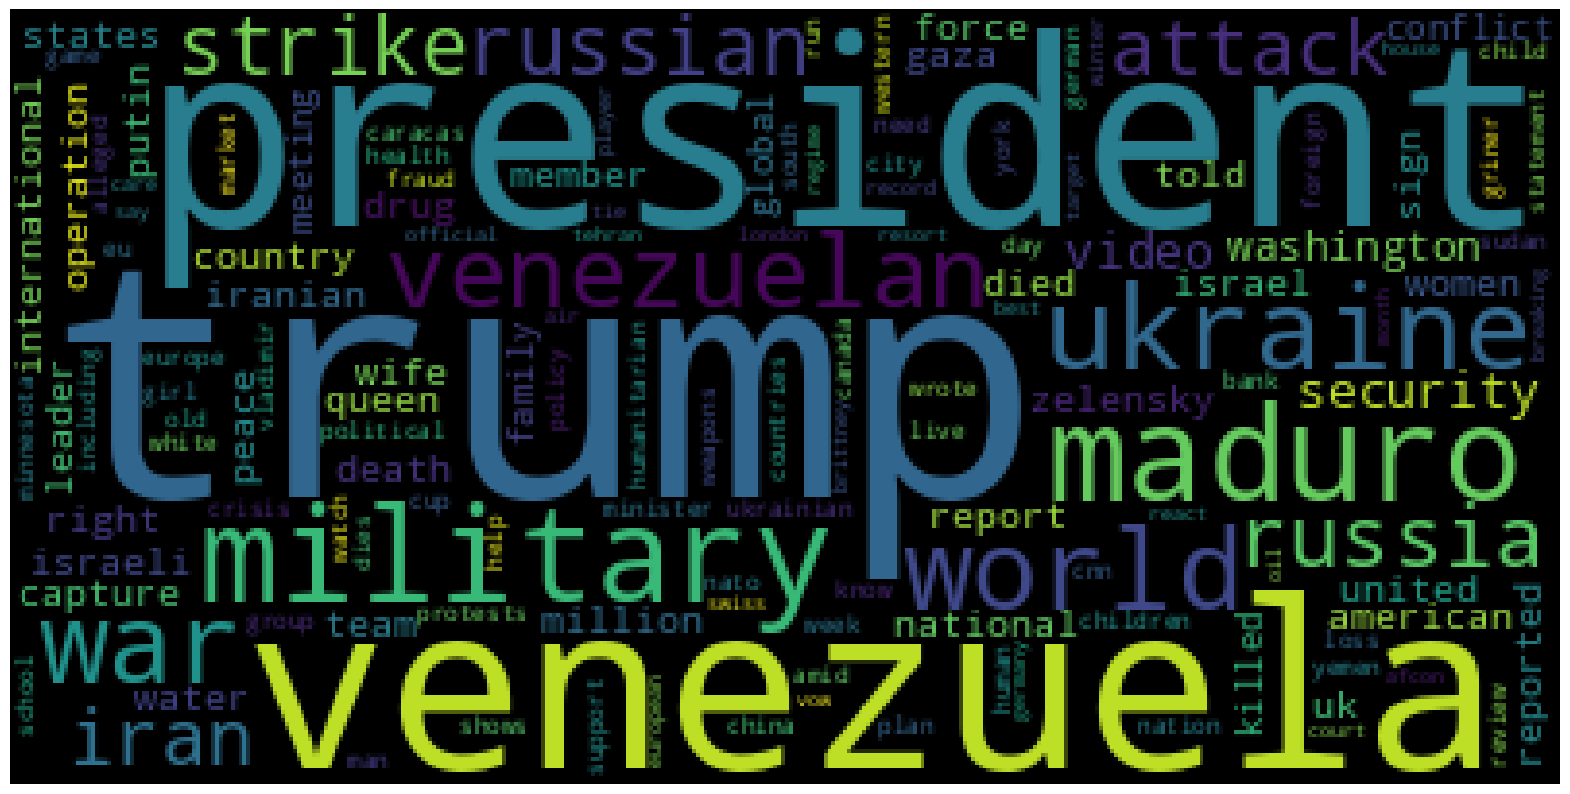

In [13]:
keywords = [j for i in df.Keywords for j in i]

text = ' '.join(i for i in keywords)
new_wordcloud = WordCloud(stopwords=stopwords,collocations=False).generate(text)

plt.figure(figsize=[20,20])
plt.imshow(new_wordcloud)
plt.axis('off')
plt.show;

#### Playing with image masking

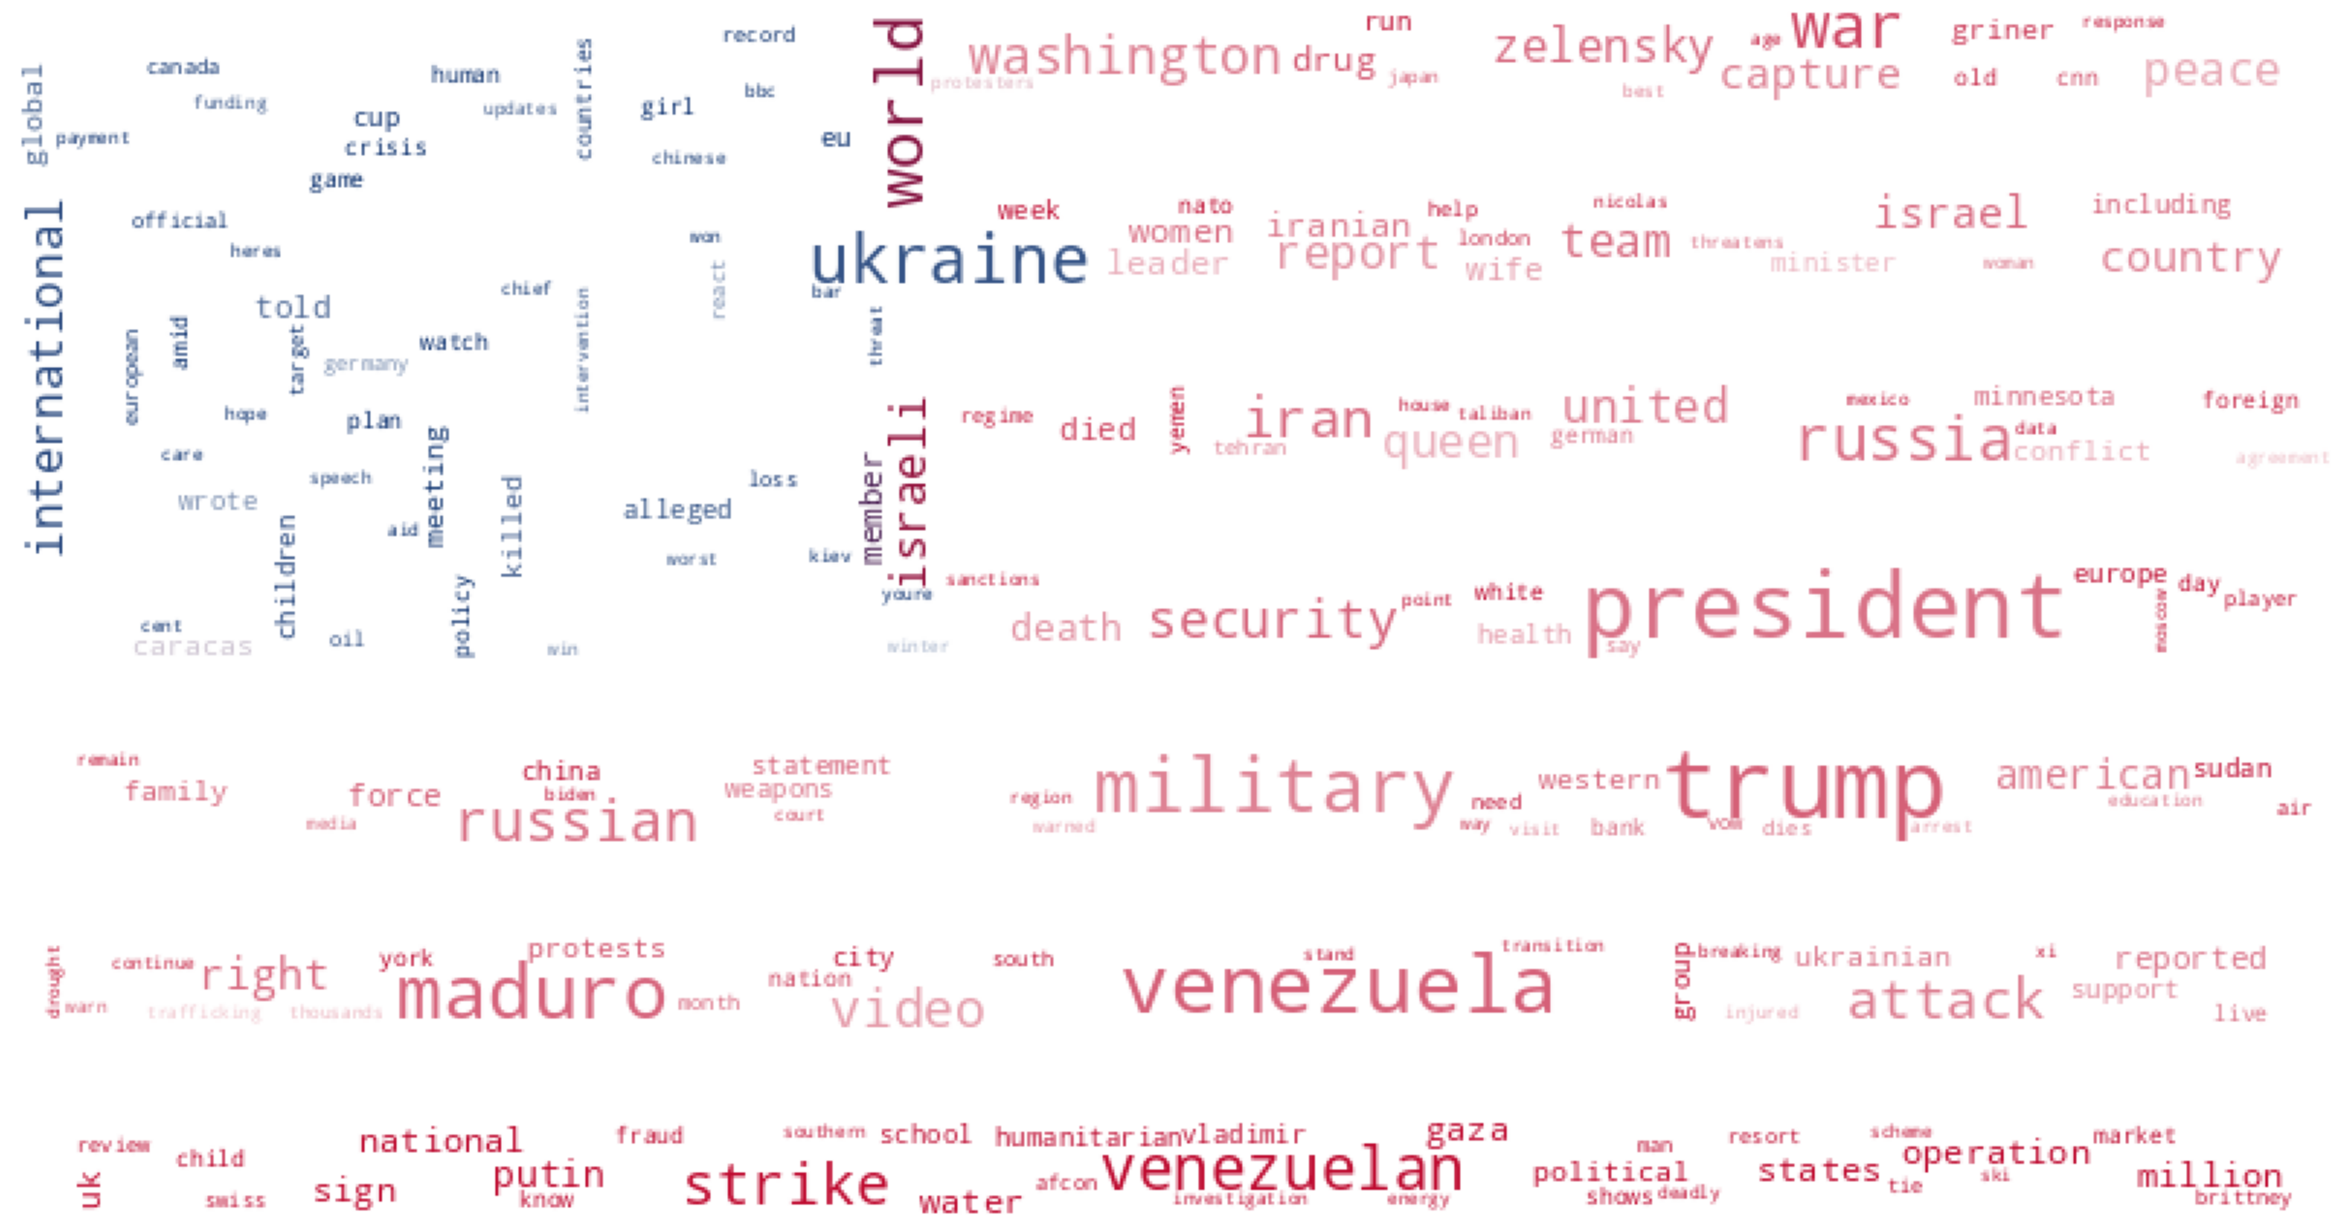

In [14]:
frame = np.array(Image.open('Flag.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)
plt.figure(figsize=[30,30])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

#### Other Examples of Word Masks

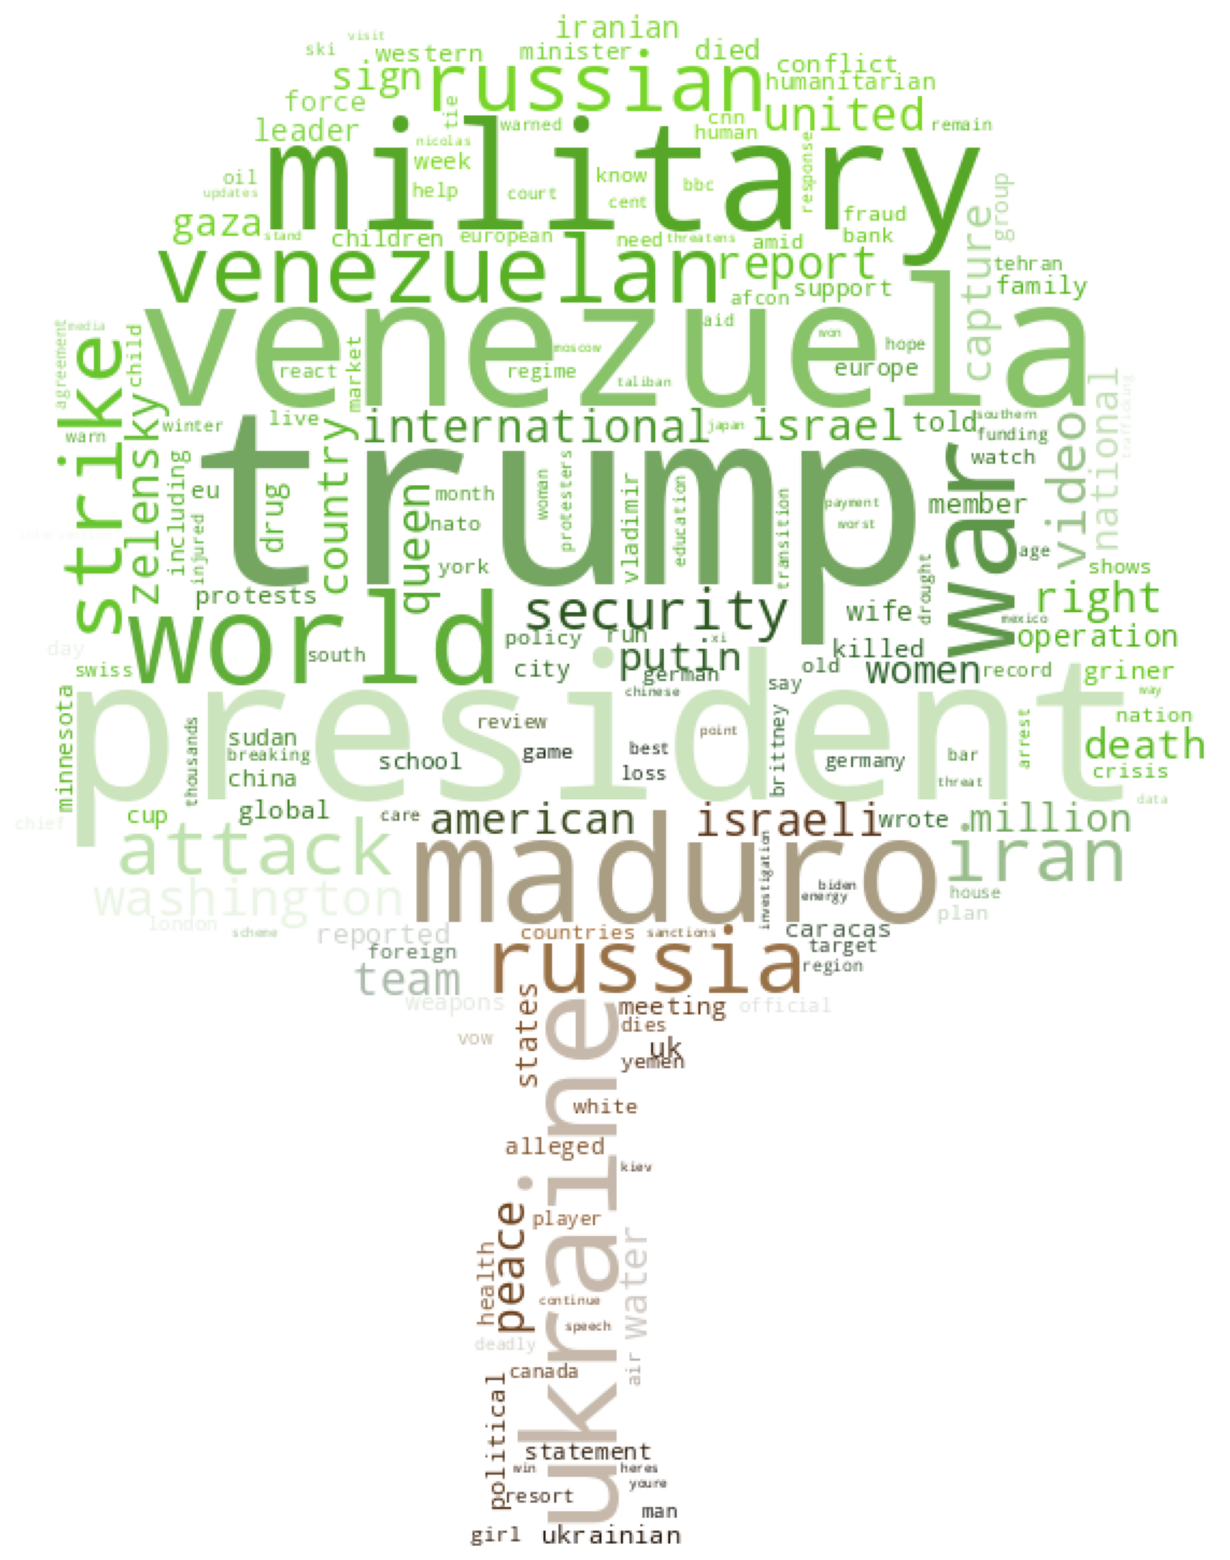

In [15]:
frame = np.array(Image.open('Tree.jpg'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[20,20])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

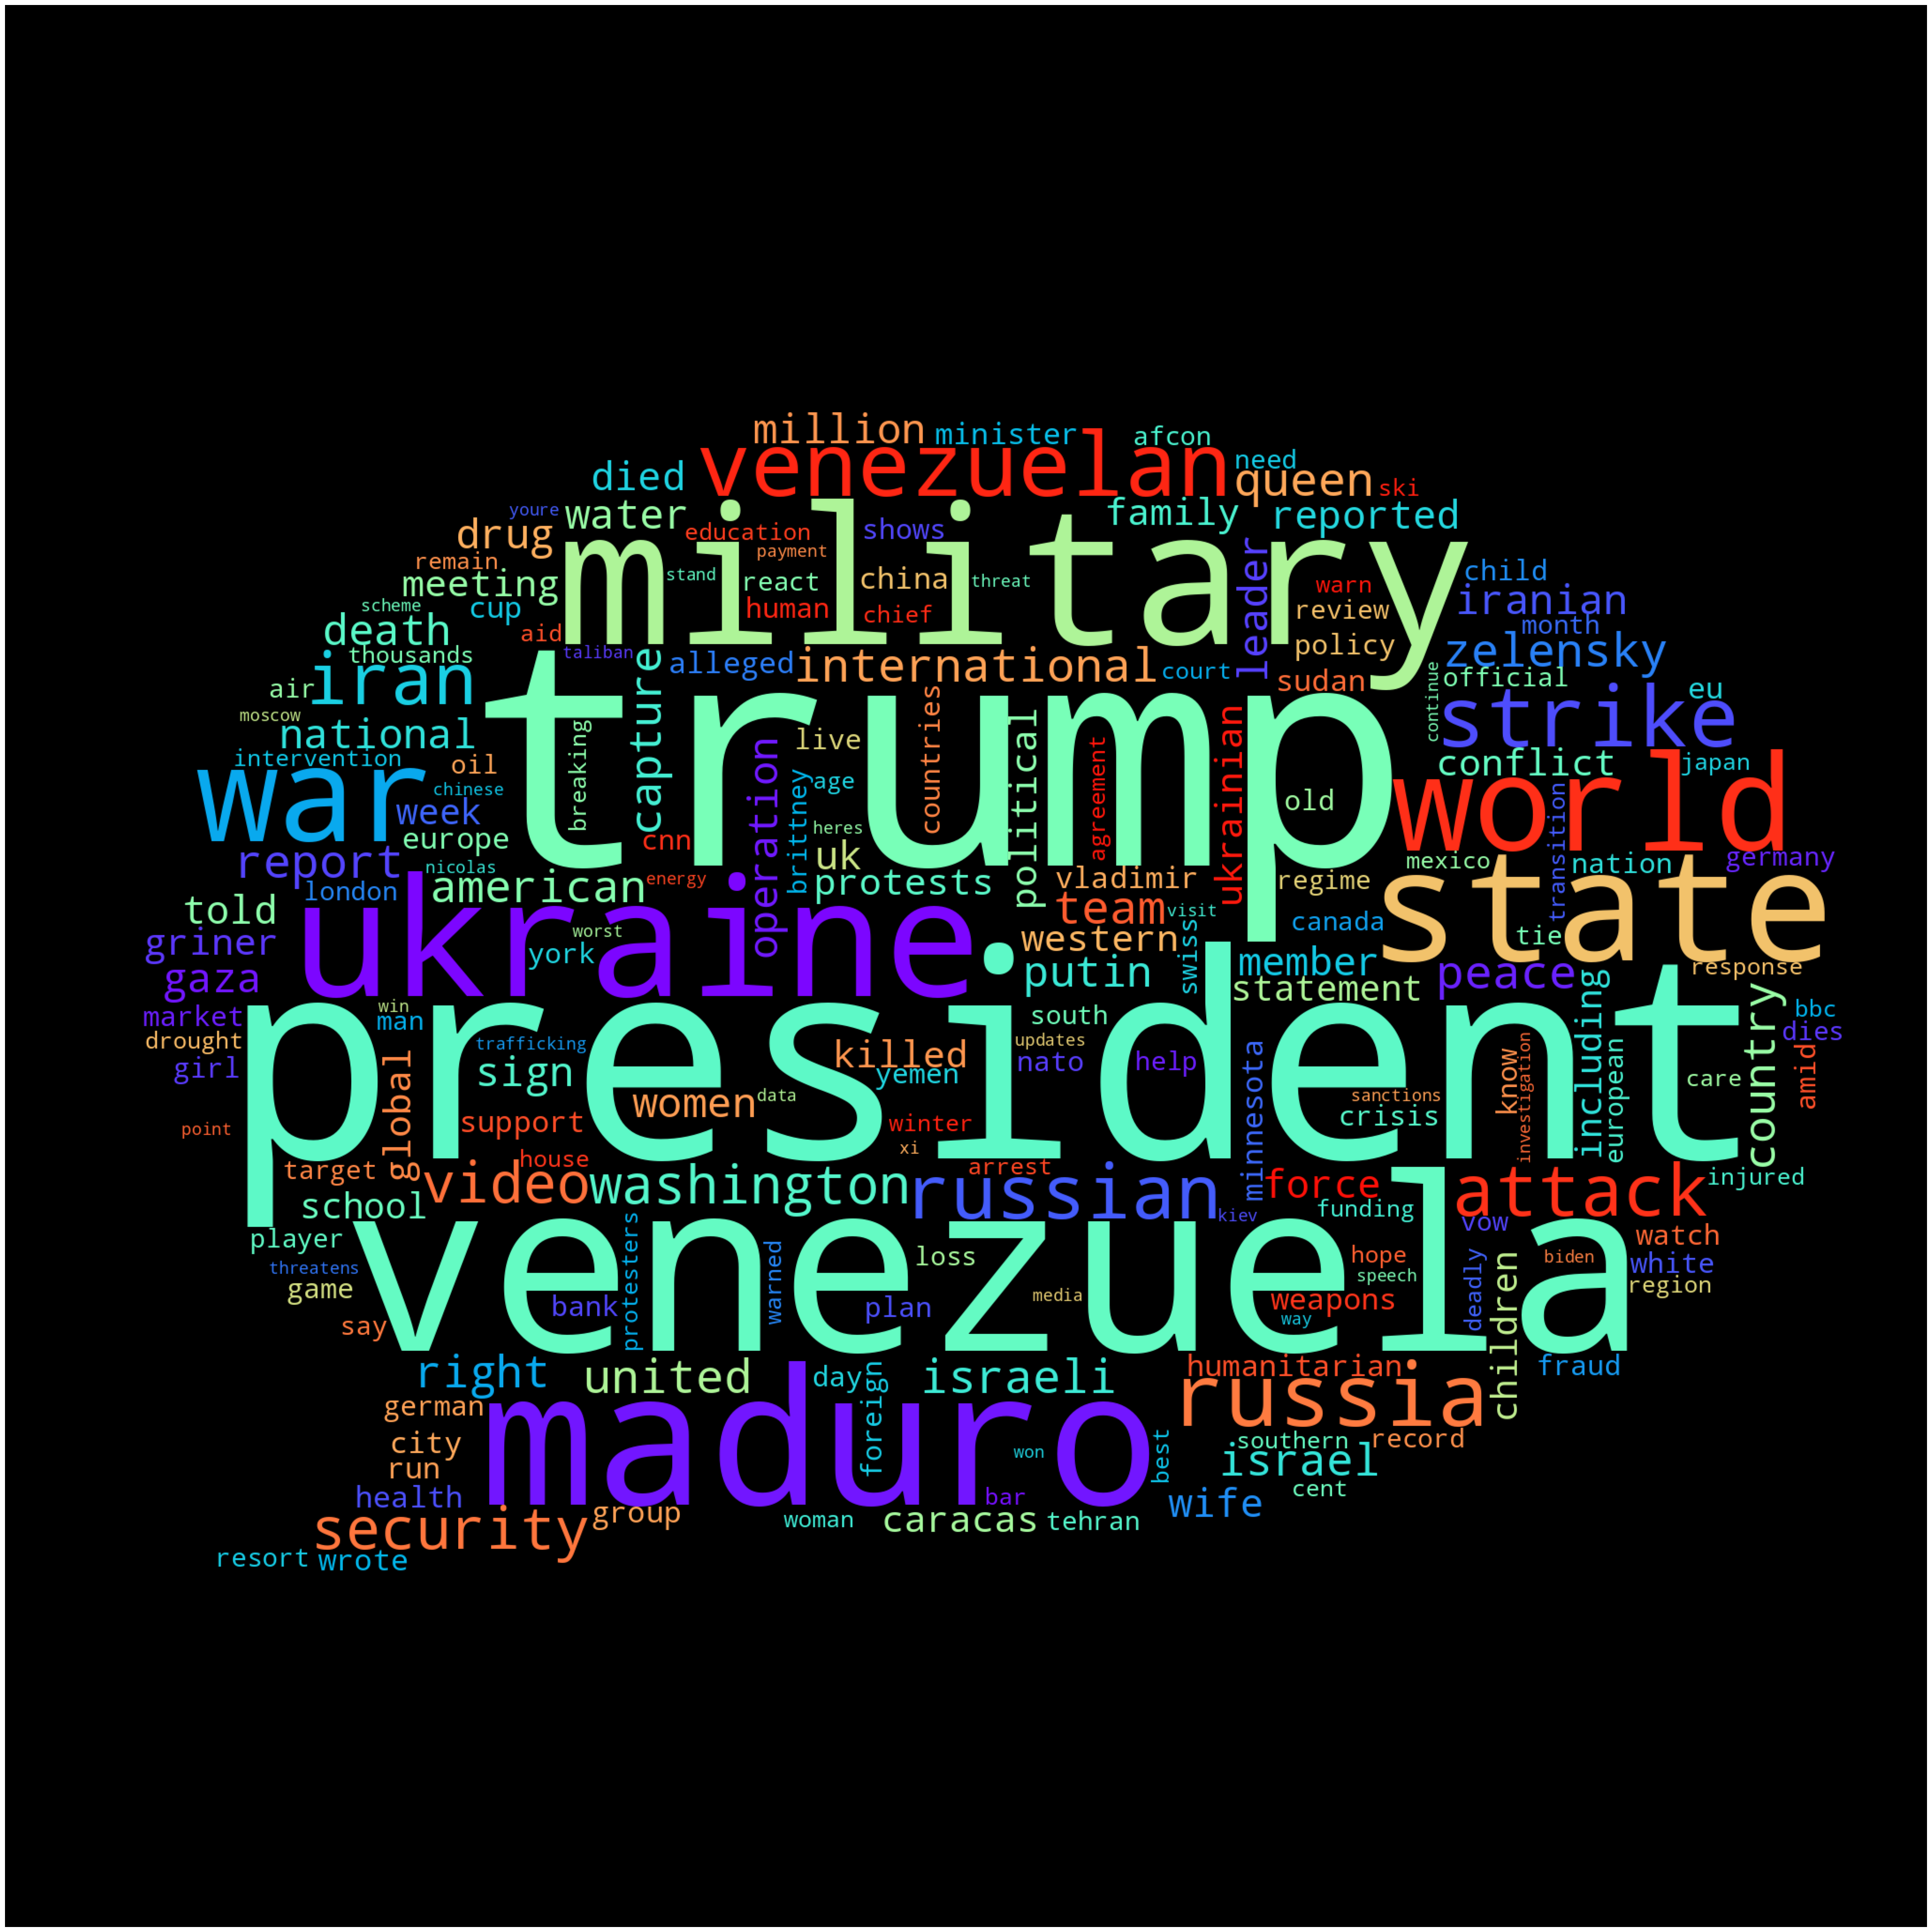

In [16]:
frame = np.array(Image.open('comment.png'))
wordcloud = WordCloud(random_state=1, colormap='rainbow', collocations=False, stopwords = STOPWORDS, mask=frame).generate(text)

plt.figure(figsize=[50,50])
plt.imshow(wordcloud)
plt.axis('off')
plt.show;

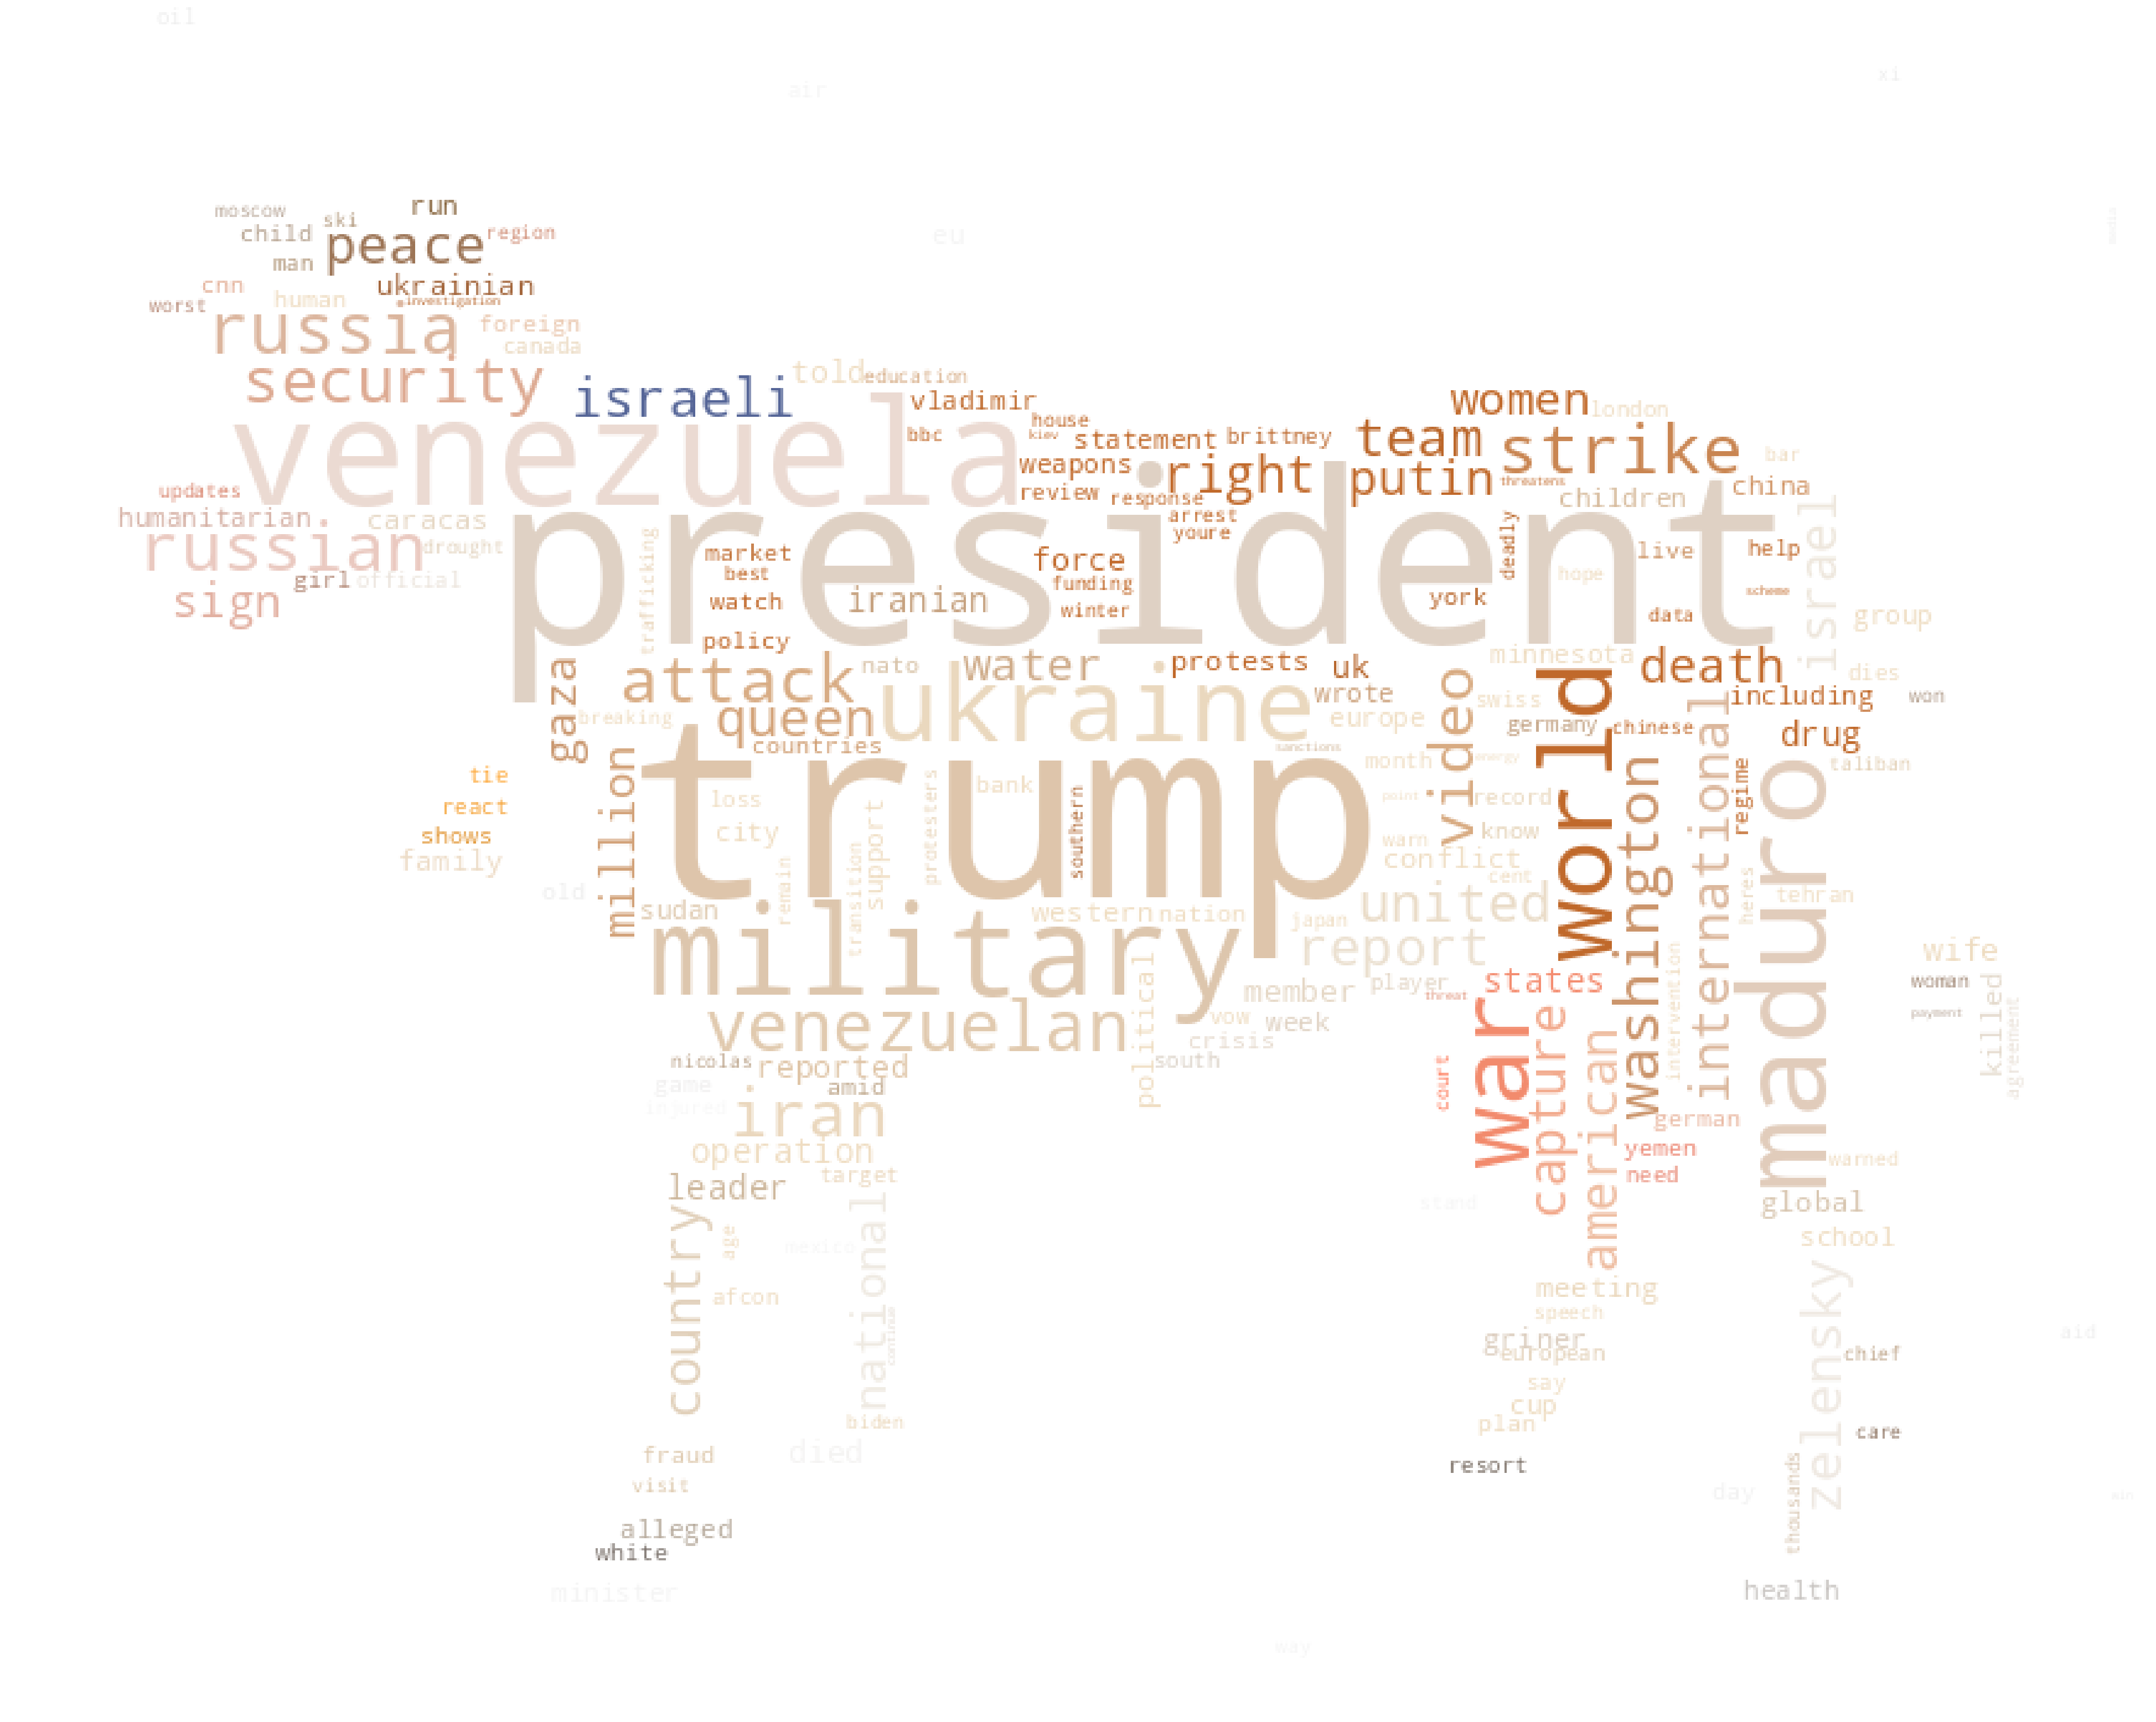

In [17]:
frame = np.array(Image.open('cow.png'))
flag_wordcloud = WordCloud(stopwords=stopwords,collocations=False,background_color='white',mask=frame).generate(text)

image_colors = ImageColorGenerator(frame)

plt.figure(figsize=[50,50])
plt.imshow(flag_wordcloud.recolor(color_func=image_colors))
plt.axis('off')
plt.show;

<a href = "https://www.youtube.com/watch?v=aGgnM-Eu3Wg">Original Video</a>